In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
'''
task 1
'''

In [4]:
nodes1 = np.linspace(0.1, 0.4, 4)

n1 = nodes1.size

def f_task1(x):
    return np.log(x ** 2 + 4)

def kth_lagrange_poly(nodes, x, k):
    return math.prod((x - nodes[i]) / (nodes[k] - nodes[i]) if i != k else 1 for i in range(n1))

def lagrange_poly(nodes, f, x):
    return sum(f(nodes[k]) * kth_lagrange_poly(nodes, x, k) for k in range(n1))

In [5]:
real_value = f_task1(0.25)
approx_value = lagrange_poly(nodes1, f_task1, 0.25)
error = abs(real_value - approx_value)
print('real value is', real_value)
print('approx value is', approx_value)
print('abs error is', error)

real value is 1.4017985476558559
approx value is 1.401800040166142
abs error is 1.492510286027482e-06


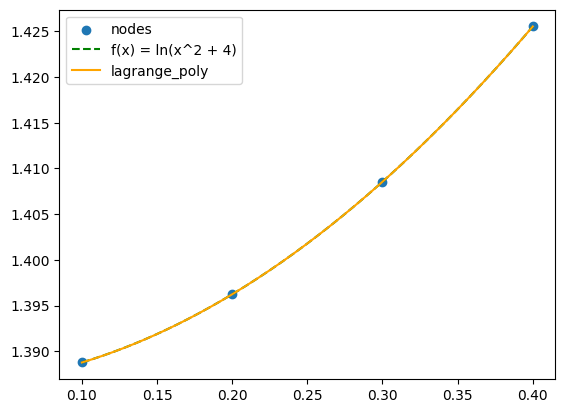

In [7]:
x_axis = np.linspace(nodes1.min(), nodes1.max(), 300)

plt.scatter(nodes1, f_task1(nodes1))
plt.plot(x_axis, f_task1(x_axis), color='green', linestyle='dashed')
plt.plot(x_axis, lagrange_poly(nodes1, f_task1, x_axis), color='orange')
plt.legend(['nodes', 'f(x) = ln(x^2 + 4)', 'lagrange_poly'])
plt.show()

In [8]:
'''
task2
'''

'\ntask2\n'

In [10]:
def f_task2(x):
    return np.e ** x

def f_task2_der1(x):
    return f_task2(x)

nodes2 = np.array([0, 0, 1, 1])
values2 = np.array([f_task2(0), f_task2_der1(0), f_task2(1), f_task2_der1(1)])

n2 = nodes2.size

def get_value(nodes, values, l, r):
    for i in range(0, r + 1):
        if nodes[i] == nodes[l]:
            return values[i + r - l]
    
    return None

def div_dif(nodes, values, l, r):
    if nodes[l] == nodes[r]:
        return get_value(nodes, values, l, r) / math.factorial(r - l)
    else:
        return (div_dif(nodes, values, l + 1, r) - div_dif(nodes, values, l, r - 1)) / (nodes[r] - nodes[l])

def hermit_poly(nodes, values, x):
    return sum(div_dif(nodes, values, 0, i) * (math.prod(x - nodes[j] for j in range(0, i))) for i in range(n2))

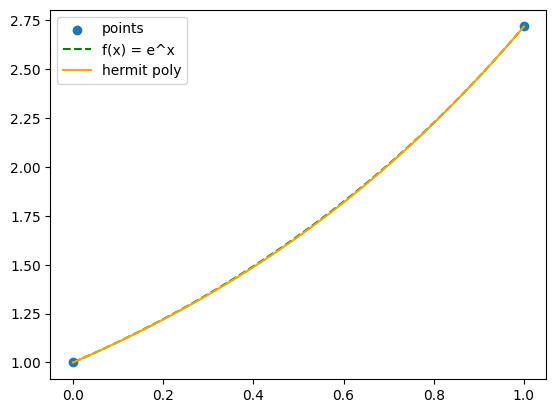

In [12]:
visual_nodes = np.array([0, 1])
visual_values = np.array([f_task2(0), f_task2(1)])

x_axis2 = np.linspace(nodes2.min(), nodes2.max(), 200)

plt.scatter(visual_nodes, visual_values)
plt.plot(x_axis2, f_task2(x_axis2), color='green', linestyle='dashed')
plt.plot(x_axis2, hermit_poly(nodes2, values2, x_axis2), color='orange')
plt.legend(['points', 'f(x) = e^x', 'hermit poly'])
plt.show()

In [13]:
real_value2 = f_task2(0.5)
approx_value2 = hermit_poly(nodes2, values2, 0.5)
error2 = abs(real_value2 - approx_value2)
print('real value is', real_value2)
print('approx value is', approx_value2)
print('abs error is', error2)

real value is 1.6487212707001282
approx value is 1.6443556856721417
abs error is 0.004365585027986452


In [ ]:
'''
task3
'''

In [14]:
nodes3 = np.array([0.01, 3, 6, 9, 12])
values3 = np.array([0.3, 0.025, 0.003, 0.00008, 0.0000032])

n3 = nodes3.size

matrix = np.ones([n3, n3])

def basis(n, x):
    return 1 / (n + x + 1)

for row in range(n3):
    for column in range(n3):
        matrix[row, column] = basis(column, nodes3[row])

print(matrix)
        
vector_column = np.linalg.solve(matrix, values3)

[[0.99009901 0.49751244 0.33222591 0.24937656 0.1996008 ]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.14285714 0.125      0.11111111 0.1        0.09090909]
 [0.1        0.09090909 0.08333333 0.07692308 0.07142857]
 [0.07692308 0.07142857 0.06666667 0.0625     0.05882353]]


In [15]:
def exp_poly(params, x, basis):
    return sum(params[i] * basis(i, x) for i in range(params.size))

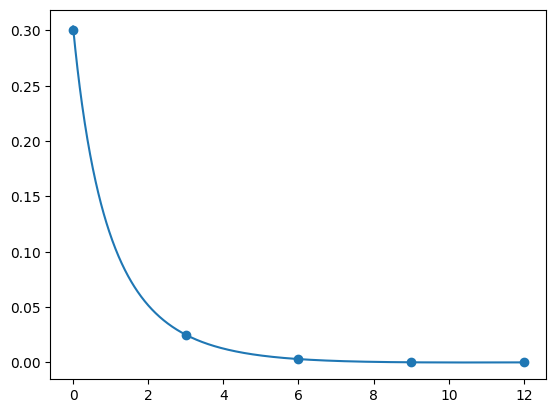

In [16]:
x_axis3 = np.linspace(0, 12, 1000)

plt.scatter(nodes3, values3)

plt.plot(x_axis3, exp_poly(vector_column, x_axis3, basis))
plt.show()

In [ ]:
'''
базис 1 е ще направи функцияра много нарастваща и не е подходящ
базис 2 е този, който използвах
базис 3 е екпоненциален в низходящ ред
базис 4 може да мени знака на функцията
'''